In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, glob
from io_utils import parse_tsplib

In [2]:
tsp = {}

for file in glob.glob("../DATA/*.tsp"):
    instance, ids, pts = parse_tsplib(file)
    tsp[instance] = len(ids)

tsp

{'Atlanta': 20,
 'berlin52': 52,
 'Boston': 40,
 'Champaign': 55,
 'Cincinnati': 10,
 'Denver': 83,
 'NYC': 68,
 'Philadelphia': 30,
 'Roanoke': 230,
 'SanFrancisco': 99,
 'Toronto': 109,
 'UKansasState': 10,
 'UMissouri': 106}

In [ ]:
bf = {"time": [], "cost": [], "full tour": []}

for file in glob.glob("../Output/BF/*.sol"):
    with open(file, "r", encoding="utf-8") as f:
        lines = [line.rstrip() for line in f] 
        bf["time"].append(float(lines[0]))
        bf["cost"].append(float(lines[1]))
        bf["full tour"].append(len(lines[2].split(", ")))
        f.close()

df = pd.DataFrame(bf)
df.index = tsp.keys()
df["full tour"] = df['full tour'] == bf['full tour']
df

,time,cost,full tour
Atlanta,600.000083,2025073.0,True
berlin52,600.000595,8324.0,True
Boston,599.999335,1028480.0,True
Champaign,600.000880,58797.0,True
Cincinnati,0.286011,277952.0,True
Denver,599.999544,109681.0,True
NYC,600.008774,1816015.0,True
Philadelphia,600.002054,1464819.0,True
Roanoke,599.993319,779832.0,True
SanFrancisco,599.994744,896718.0,True


In [ ]:
approx = {"time": [], "cost": [], "full tour": []}

for file in glob.glob(rf"../Output/Approx/*.sol"):
    with open(file, "r", encoding="utf-8") as f:
        lines = [line.rstrip() for line in f] 
        approx["time"].append(float(lines[0]))
        approx["cost"].append(float(lines[1]))
        approx["full tour"].append(len(lines[2].split(", ")))
        f.close()

df = pd.DataFrame(approx)
df.index = tsp.keys()
df["full tour"] = df['full tour'] == approx['full tour']
df

,time,cost,full tour
Atlanta,0.000085,2380448.0,True
berlin52,0.000342,10402.0,True
Boston,0.000234,1150963.0,True
Champaign,0.000548,65712.0,True
Cincinnati,0.000040,301216.0,True
Denver,0.001006,134748.0,True
NYC,0.000526,2027107.0,True
Philadelphia,0.000282,1646249.0,True
Roanoke,0.004777,838282.0,True
SanFrancisco,0.000825,1134989.0,True


In [24]:
ls = {"time": [], "cost": [], "full tour": [], "min_cost": []}

for city in tsp.keys():

    time_list = []
    cost_list = []
    full_tour_list = []
    min_cost = np.inf

    for file in glob.glob(rf"../Output/LS/{city}*.sol"):
        with open(file, "r", encoding="utf-8") as f:
            lines = [line.rstrip() for line in f]

        t = float(lines[0])
        c = float(lines[1])
        ft = len(lines[2].split(", "))

        time_list.append(t)
        cost_list.append(c)
        full_tour_list.append(ft)

        if c < min_cost:
            min_cost = c

    ls["time"].append(sum(time_list) / len(time_list))
    ls["cost"].append(sum(cost_list) / len(cost_list))
    ls["full tour"].append(sum(full_tour_list) / len(full_tour_list))
    ls["min_cost"].append(min_cost)

df = pd.DataFrame(ls, index=tsp.keys())
df["full tour"] = df['full tour'] == ls['full tour']
df

,time,cost,full tour,min_cost
Atlanta,0.000313,2051419.2,True,2003763.0
berlin52,0.003216,7902.9,True,7542.0
Boston,0.001721,933085.0,True,910388.0
Champaign,0.004970,53733.5,True,52991.0
Cincinnati,0.000097,279297.5,True,277952.0
Denver,0.015796,104891.3,True,102986.0
NYC,0.009096,1624081.7,True,1575710.0
Philadelphia,0.001107,1426365.0,True,1400046.0
Roanoke,0.317445,686904.9,True,677049.0
SanFrancisco,0.021642,852824.3,True,837653.0


In [32]:
ls_multistart = {"time": [], "cost": [], "cost_std": [], "full tour": [], "min_cost": []}
files = glob.glob("../Output/LS-multistart/*.sol")

for t in [0.1, 1.0, 3.0, 5.0, 10.0, 30.0, 60.0, 120.0]:
    filtered = [f for f in files if f" {t} " in f]

    time_list = []
    cost_list = []
    full_tour_list = []
    min_cost = np.inf

    for file in filtered:
        with open(file, "r", encoding="utf-8") as f:
            lines = [line.rstrip() for line in f]

        t = float(lines[0])
        c = float(lines[1])
        ft = len(lines[2].split(", "))

        time_list.append(t)
        cost_list.append(c)
        full_tour_list.append(ft)

        if c < min_cost:
            min_cost = c

    ls_multistart["time"].append(sum(time_list) / len(time_list))
    ls_multistart["cost"].append(sum(cost_list) / len(cost_list))
    ls_multistart["cost_std"].append(np.std(cost_list))
    ls_multistart["full tour"].append(sum(full_tour_list) / len(full_tour_list))
    ls_multistart["min_cost"].append(min_cost)

df = pd.DataFrame(ls_multistart, index=[0.1, 1.0, 3.0, 5.0, 10.0, 30.0, 60.0, 120.0])
df["full tour"] = df['full tour'] == ls_multistart['full tour']
df

,time,cost,cost_std,full tour,min_cost
0.1,0.099420,1.196045e+06,16441.093770,True,1177388.0
1.0,1.003058,1.177254e+06,319.075439,True,1177009.0
3.0,3.000543,1.177098e+06,140.237834,True,1177009.0
5.0,5.000132,1.177197e+06,334.476189,True,1177009.0
10.0,10.000357,1.177009e+06,0.000000,True,1177009.0
30.0,29.999993,1.177009e+06,0.000000,True,1177009.0
60.0,59.999884,1.177009e+06,0.000000,True,1177009.0
120.0,120.005246,1.177009e+06,0.000000,True,1177009.0


Text(0, 0.5, 'Average Tour Cost')

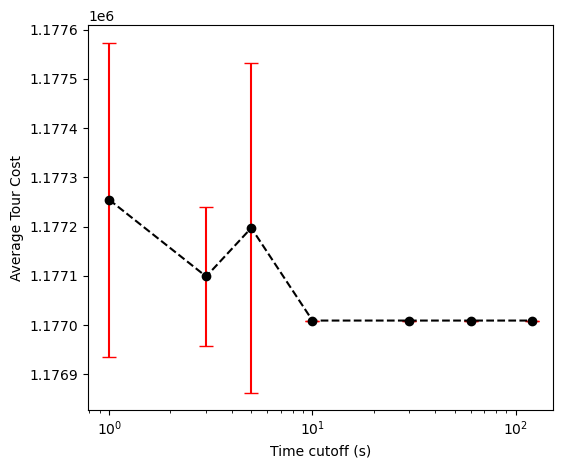

In [62]:
plt.figure(figsize=(6,5)) 
plt.errorbar(df.index[1:], df['cost'].iloc[1:], yerr=df['cost_std'].iloc[1:], fmt='--o', capsize=5, color='black', ecolor='red') 
plt.xscale('log') 
plt.xlabel("Time cutoff (s)") 
plt.ylabel("Average Tour Cost")

C:\Users\chase\AppData\Local\Temp\ipykernel_7296\104823894.py:20: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  subset_y = df['cost'][1:]
C:\Users\chase\AppData\Local\Temp\ipykernel_7296\104823894.py:21: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  subset_err = df['cost_std'][1:]
C:\Users\chase\AppData\Local\Temp\ipykernel_7296\104823894.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


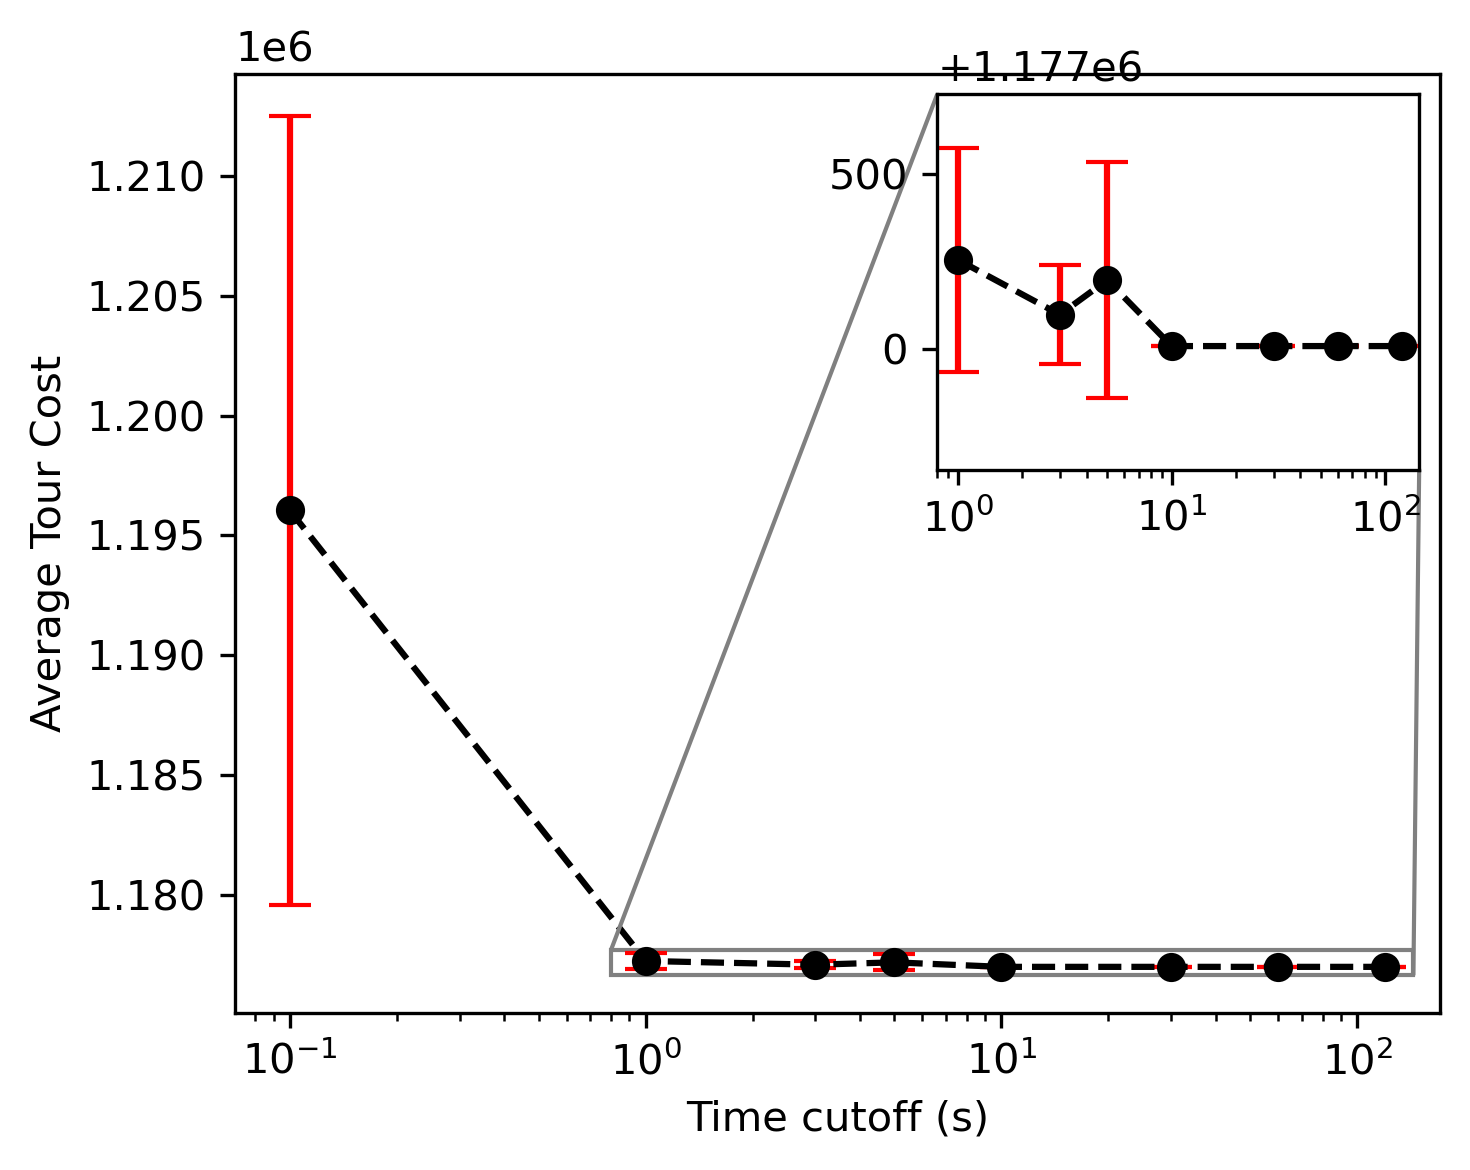

In [64]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.figure(figsize=(5,4), dpi=300)

# Main plot
plt.errorbar(df.index, df['cost'], yerr=df['cost_std'],
             fmt='--o', capsize=5, color='black', ecolor='red')
plt.xscale('log')
plt.xlabel("Time cutoff (s)")
plt.ylabel("Average Tour Cost")

# ADD ZOOMED INSET
ax = plt.gca()

# Create inset axes (size: 40% width, 40% height, location: upper-right)
axins = inset_axes(ax, width="40%", height="40%", loc='upper right')

# Plot subset: skip first index
subset_x = df.index[1:]
subset_y = df['cost'][1:]
subset_err = df['cost_std'][1:]

axins.errorbar(subset_x, subset_y, yerr=subset_err,
               fmt='--o', capsize=5, color='black', ecolor='red')

axins.set_xscale('log')

# Adjust zoom limits so it focuses nicely
axins.set_xlim(min(subset_x)*0.8, max(subset_x)*1.2)
axins.set_ylim(min(subset_y)*0.9997, max(subset_y)*1.0004)

# Optional: add bounding lines connecting inset & main plot
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.tight_layout()
plt.show()
